# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [4]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

m =len(X)

numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x)*(Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
# finding y = mx + c 
# where
b1 = numer / denom  # is M
b0 = mean_y - (b1 * mean_x)  # is C

# print co-efficient
print(b1, b0)

0.26342933948939945 325.57342104944223


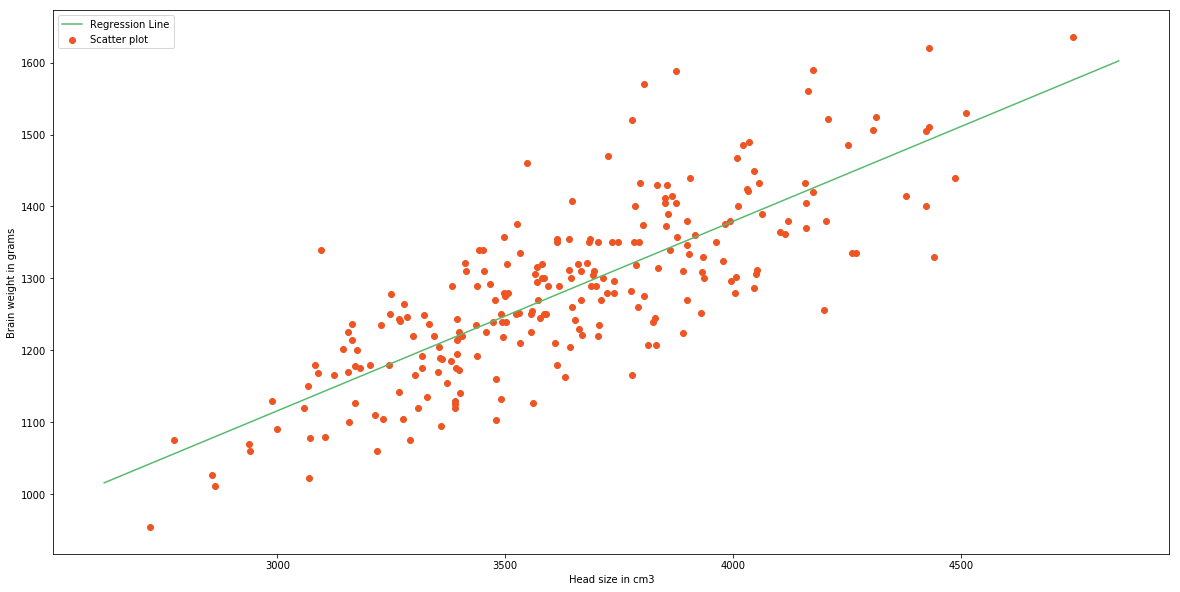

In [7]:
# Plotting values and regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='Scatter plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [8]:
# Calculating R-square
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


As the R-square value is near to 1 this model is a good choice for predicting the values.

# Linear Regression using SciKit Learn

In [ ]:
# taking into consideration all the imported files and the dataset

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((m, 1))
# creating model

reg = LinearRegression()
# fitting training dataset

reg = reg.fit(X, Y)
# Y prediction

Y_pred = reg.predict(X)

# Calculating R square

r2_score = reg.score(X, Y)
print(r2_score)